In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [2]:
image = cv2.imread("D:\CSE BRACU\CSE439-Machine-Vision\Assignment\Test_image.png", cv2.IMREAD_GRAYSCALE)

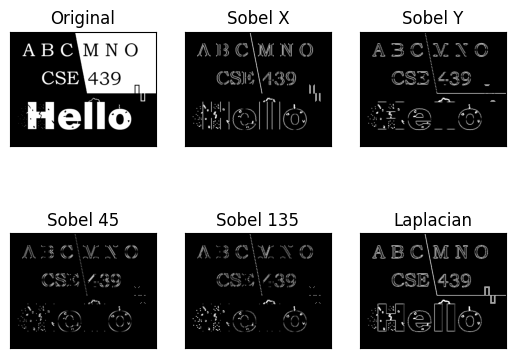

In [3]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)          # sobel x
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)          # sobel y
sobel_45 = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)         # sobel 45

sobel_135_kernel = np.array([
    [-1, -1,  2],
    [-1,  2, -1],
    [ 2, -1, -1]
])

sobel_135 = cv2.filter2D(image, cv2.CV_64F, sobel_135_kernel)     # sobel 135

laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)             # laplacian

sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))
sobel_45 = np.uint8(np.absolute(sobel_45))
sobel_135 = np.uint8(np.absolute(sobel_135))
laplacian = np.uint8(np.absolute(laplacian))

# Display the images
titles = ['Original', 'Sobel X', 'Sobel Y', 'Sobel 45', 'Sobel 135', 'Laplacian']
images = [image, sobel_x, sobel_y, sobel_45, sobel_135, laplacian]

for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### Laplacian was better

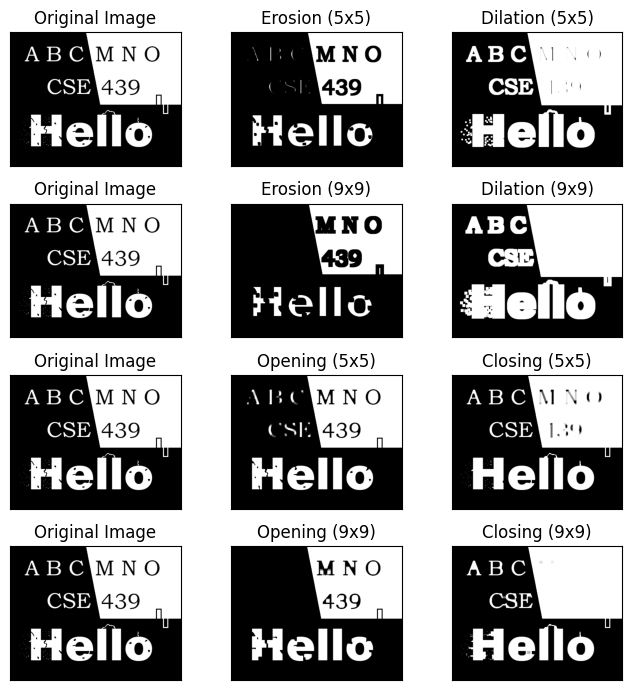

In [4]:
kernel_5x5 = np.ones((5, 5), dtype=np.uint8)
kernel_9x9 = np.ones((9, 9), dtype=np.uint8)

# erosion and dilation
erosion_5x5 = cv2.erode(image, kernel_5x5, iterations=1)
dilation_5x5 = cv2.dilate(image, kernel_5x5, iterations=1)

erosion_9x9 = cv2.erode(image, kernel_9x9, iterations=1)
dilation_9x9 = cv2.dilate(image, kernel_9x9, iterations=1)

# opening and closing
opening_5x5 = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel_5x5)
closing_5x5 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_5x5)

opening_9x9 = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel_9x9)
closing_9x9 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_9x9)


plt.figure(figsize=(9, 7))

# First row: Erosion and Dilation (5x5)
plt.subplot(441), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(442), plt.imshow(erosion_5x5, cmap='gray')
plt.title('Erosion (5x5)'), plt.xticks([]), plt.yticks([])
plt.subplot(443), plt.imshow(dilation_5x5, cmap='gray')
plt.title('Dilation (5x5)'), plt.xticks([]), plt.yticks([])

# Second row: Erosion and Dilation (9x9)
plt.subplot(445), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(446), plt.imshow(erosion_9x9, cmap='gray')
plt.title('Erosion (9x9)'), plt.xticks([]), plt.yticks([])
plt.subplot(447), plt.imshow(dilation_9x9, cmap='gray')
plt.title('Dilation (9x9)'), plt.xticks([]), plt.yticks([])

# Third row: Opening and Closing (5x5)
plt.subplot(449), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,10), plt.imshow(opening_5x5, cmap='gray')
plt.title('Opening (5x5)'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,11), plt.imshow(closing_5x5, cmap='gray')
plt.title('Closing (5x5)'), plt.xticks([]), plt.yticks([])

# Fourth row: Opening and Closing (9x9)
plt.subplot(4,4,13), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,14), plt.imshow(opening_9x9, cmap='gray')
plt.title('Opening (9x9)'), plt.xticks([]), plt.yticks([])
plt.subplot(4,4,15), plt.imshow(closing_9x9, cmap='gray')
plt.title('Closing (9x9)'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

1. **Erosion (5x5)**: Erosion is a morphological operation that "erodes away" the boundaries of foreground objects in an image. It achieves this by moving a kernel over the image and replacing each pixel's value with the minimum value of its neighboring pixels covered by the kernel. This operation tends to shrink the boundaries of foreground objects. In the case of a 5x5 structuring element, the erosion operation will result in more pronounced thinning of object boundaries compared to smaller structuring elements.

2. **Dilation (5x5)**: Dilation is the opposite of erosion. It "dilates" the boundaries of foreground objects by replacing each pixel's value with the maximum value of its neighboring pixels covered by the kernel. Dilation tends to expand the boundaries of foreground objects. With a 5x5 structuring element, the dilation operation will lead to a thicker and more pronounced boundary of objects compared to smaller structuring elements.

3. **Erosion (9x9)**: Similar to the erosion operation with a 5x5 structuring element, but with a larger kernel size (9x9), the erosion operation here will cause more aggressive shrinking of the foreground object boundaries. This operation tends to remove finer details from the objects.

4. **Dilation (9x9)**: Similarly, dilation with a 9x9 structuring element will result in a more extensive expansion of foreground object boundaries compared to the 5x5 structuring element. It will create a thicker boundary around objects.

5. **Opening (5x5)**: Opening is a combination of erosion followed by dilation. It is useful in removing noise from images while preserving the shape and size of the objects. The erosion operation removes small objects and "breaks" thin connections, and the subsequent dilation operation restores the size of the remaining objects. With a 5x5 structuring element, opening will effectively remove smaller noise while preserving the main structure of objects.

6. **Closing (5x5)**: Closing is the reverse of opening, consisting of dilation followed by erosion. It is effective in closing small holes in objects or in joining small breaks in the contours. With a 5x5 structuring element, closing will fill in small gaps or holes within objects.

7. **Opening (9x9)**: Similar to opening with a 5x5 structuring element, but with a larger kernel size (9x9), this operation will be more effective in removing noise and small details while preserving the main structures of objects.

8. **Closing (9x9)**: Similar to closing with a 5x5 structuring element, but with a larger kernel size (9x9), this operation will effectively fill in larger gaps or holes within objects.